# Computer Vision Tutorial: Data Science Workshop, IIT Bhilai


## Overview
This Jupyter Notebook provides a hands-on introduction to computer vision for the Data Science Workshop at IIT Bhilai. Designed for beginners to intermediate learners, it covers key concepts and practical techniques using Python. Complete the exercises to reinforce your understanding.

## Objectives
- Understand computer vision and its applications.
- Learn key Python libraries for computer vision.
- Explore image representation as arrays/matrices.
- Implement image preprocessing, edge detection (Sobel filter), feature detection, and basic object detection.
- Apply techniques to sample images and the MNIST dataset.

## Prerequisites
- **Environment**: Install Python 3.8+, Jupyter Notebook, and libraries:
  ```bash
  pip install opencv-python numpy matplotlib pillow scikit-learn
  ```
- **Datasets**:
  - `sample_square.png`: Grayscale image with a white square.
  - `sample_shapes.png`: RGB image with a red rectangle and blue circle.
  - MNIST dataset: Loaded via `scikit-learn`.
- **Setup**:
  1. Run `create_square.py` and `create_shapes.py` to generate sample images.
  2. Place images in your Jupyter Notebook’s working directory.
  3. Optionally, download a sample image (e.g., `sample_image.jpg`) from the web.

## 1. What is Computer Vision?
Computer vision enables computers to interpret visual data (images and videos) like humans, extracting meaningful information from pixels using algorithms and machine learning.

### Applications
- **Medical Imaging**: Detecting tumors in X-rays or MRIs.
- **Autonomous Vehicles**: Identifying road signs and pedestrians.
- **Facial Recognition**: Unlocking devices or security systems.
- **Retail**: Automated checkout via product recognition.
- **Agriculture**: Monitoring crop health with drone imagery.

**Exercise**: Research one computer vision application relevant to your field and describe its use in a Markdown cell below.

### Your Answer (Exercise)
Add your response here.

## 2. Key Libraries for Computer Vision
We’ll use:
- **OpenCV (`cv2`)**: Image processing, filtering, feature detection.
- **NumPy**: Array manipulation for image data.
- **Matplotlib**: Visualizing images and results.
- **PIL (Pillow)**: Image loading and basic manipulation.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

print("cv2:", cv2.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("Pillow:", Image.__version__)

# Exercise: Run this cell to verify library installation.

cv2: 4.11.0
numpy: 2.0.2
matplotlib: 3.10.0
Pillow: 11.2.1


## 3. Image Representation: Arrays and Matrices
Images are stored as numerical arrays:
- **Grayscale**: 2D array (rows, columns) with pixel intensities (0–255).
- **RGB**: 3D array (rows, columns, channels) with Red, Green, Blue channels.
- Pixel values: 0 (black) to 255 (white) for 8-bit images.

Shape: (1018, 1024)
Pixel at (50, 50): 2


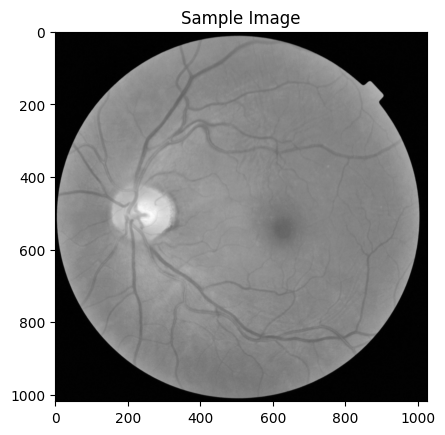

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('/content/10015_left.jpeg', cv2.IMREAD_GRAYSCALE)
print('Shape:', img.shape)
print('Pixel at (50, 50):', img[50, 50])
plt.imshow(img, cmap='gray')
plt.title('Sample Image')
plt.show()

**Exercise**:
1. Load `10015_left.png` in RGB, print its shape, and display it.
2. Extract and print the red channel (index 0) of `sample_shapes.png`.

In [ ]:
# Your code here for Exercise 3.1 and 3.2


## 4. Image Preprocessing
Preprocessing enhances images for analysis:
- **Grayscale Conversion**: Reduces RGB to one channel.
- **Resizing**: Adjusts dimensions.
- **Normalization**: Scales pixel values (e.g., 0–1).
- **Blurring**: Reduces noise with Gaussian blur.

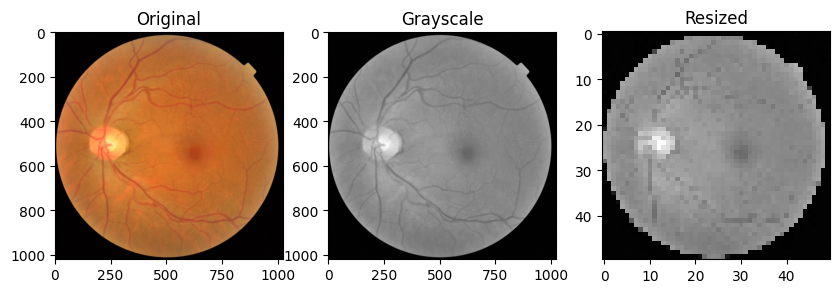

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load RGB image
img = cv2.imread('/content/10015_left.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
resized = cv2.resize(gray, (50, 50))  # Resize to 50x50
blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian blur
normalized = blurred / 255.0  # Normalize to 0-1

# Display
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(132), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(133), plt.imshow(resized, cmap='gray'), plt.title('Resized')
plt.show()

**Exercise**:
1. Apply Gaussian blur to `sample_square.png` with a 7x7 kernel.
2. Normalize `sample_square.png` pixel values to 0–1 and print min/max values.

In [ ]:
# Your code here for Exercise 4.1 and 4.2


## 5. Edge Detection and Sobel Filter
Edge detection identifies boundaries using intensity changes. The Sobel filter computes gradients in x and y directions.

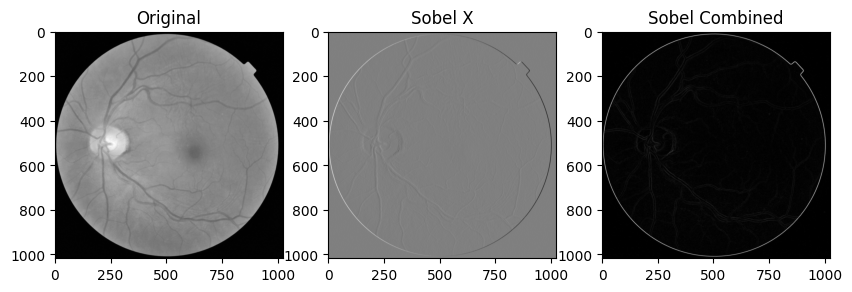

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('/content/10015_left.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # X-direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Y-direction
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)  # Magnitude

# Display
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(133), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()

**Exercise**:
1. Apply Sobel filter to `sample_shapes.png` (grayscale) and display Sobel Y.
2. Compare Sobel edges with Canny edge detection (`cv2.Canny`) on `sample_square.png`.

In [ ]:
# Your code here for Exercise 5.1 and 5.2


## 6. Feature Detection: Corners
Corner detection (e.g., Harris Corner Detector) identifies points with significant intensity changes in multiple directions.

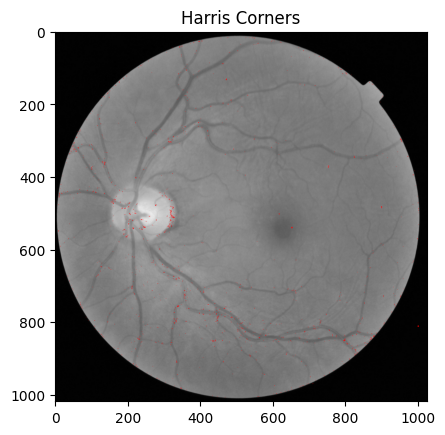

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('/content/10015_left.jpeg', cv2.IMREAD_GRAYSCALE)
img_float = np.float32(img)

# Harris Corner Detector
corners = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.04)
img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_corners[corners > 0.01 * corners.max()] = [255, 0, 0]  # Mark corners in red

# Display
plt.imshow(img_corners)
plt.title('Harris Corners')
plt.show()

**Exercise**:
1. Apply Harris Corner Detector to `sample_shapes.png` (grayscale).
2. Adjust `blockSize` and `k` parameters and observe changes in corner detection.

In [ ]:
# Your code here for Exercise 6.1 and 6.2


## 7. Basic Object Detection: Template Matching
Template matching locates a smaller image (template) within a larger image by computing similarity.

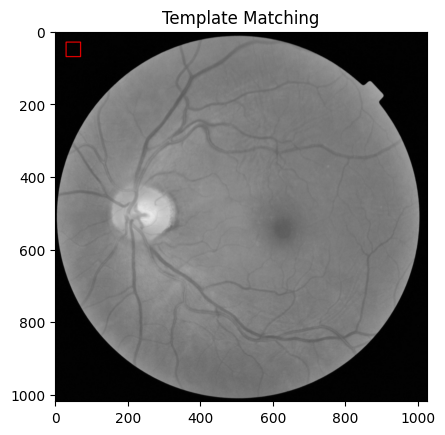

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread('/content/10015_left.jpeg', cv2.IMREAD_GRAYSCALE)
template = img[30:70, 30:70]  # Extract square as template

# Template matching
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw rectangle around match
top_left = max_loc
bottom_right = (top_left[0] + 40, top_left[1] + 40)
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 2)

# Display
plt.imshow(img_rgb)
plt.title('Template Matching')
plt.show()

**Exercise**:
1. Create a template from the red rectangle in `sample_shapes.png` and perform template matching.
2. Try different matching methods (e.g., `cv2.TM_SQDIFF`) and compare results.

In [ ]:
# Your code here for Exercise 7.1 and 7.2


## 8. Hands-On: Process MNIST Dataset
The MNIST dataset (handwritten digits) is ideal for computer vision tasks. We’ll load it via `scikit-learn` and apply preprocessing, edge detection, and feature detection.

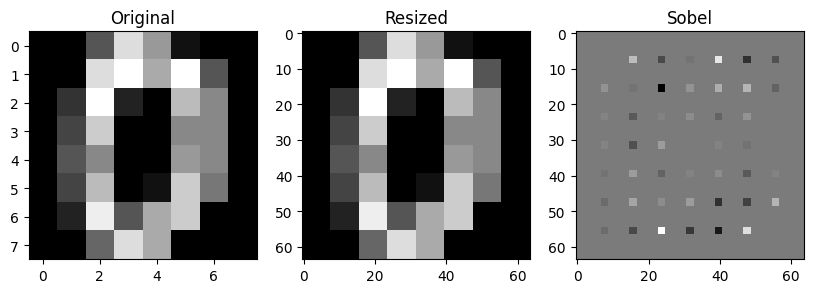

In [10]:
from sklearn.datasets import load_digits
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
digits = load_digits()
img = digits.images[0]  # First digit image (8x8)

# Preprocess
img_uint8 = np.uint8(img * 16)  # Scale to 0-255
resized = cv2.resize(img_uint8, (64, 64), interpolation=cv2.INTER_AREA)  # Resize
sobel = cv2.Sobel(resized, cv2.CV_64F, 1, 1, ksize=3)  # Sobel filter

# Display
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(resized, cmap='gray'), plt.title('Resized')
plt.subplot(133), plt.imshow(sobel, cmap='gray'), plt.title('Sobel')
plt.show()

**Exercise**:
1. Load a different MNIST digit and apply Gaussian blur before Sobel filtering.
2. Detect corners in a resized MNIST digit using Harris Corner Detector.
3. Discuss how preprocessing affects edge detection results (add your answer in a Markdown cell).

In [ ]:
# Your code here for Exercise 8.1 and 8.2
